In [15]:
#install the following package
#!pip install  torch numpy scikit-learn h5py PyWavelets

# Step 1: loading mat file
import numpy as np
import h5py
from bcgunet import bcgunet
f = h5py.File("C:\\Users\\tyhua\\Downloads\\EyeClose1_noscan\\EyeClose1_noscan.mat", 'r')
ECG = np.array(f['ECG']).flatten()
EEG = np.array(f['EEG_before_bcg']).T
EEG_OBS = np.array(f['EEG']).T

print(ECG.shape)
print(EEG.shape)


(934200,)
(31, 934200)


In [3]:
# Step 2: Get BCG from EEG and ECG
# (input_eeg, input_ecg, sfreq=5000, iter_num=5000, winsize_sec=2, lr=1e-3, onecycle=True)
# BCG = bcgunet.run(EEG, ECG, iter_num=10000)
# BCG = bcgunet.run(EEG) run it without ECG
EEG_unet = bcgunet.run(EEG, ECG)



Loss 200.552, lr: 0.00000: 100%|██████████| 5000/5000 [03:12<00:00, 25.97it/s]


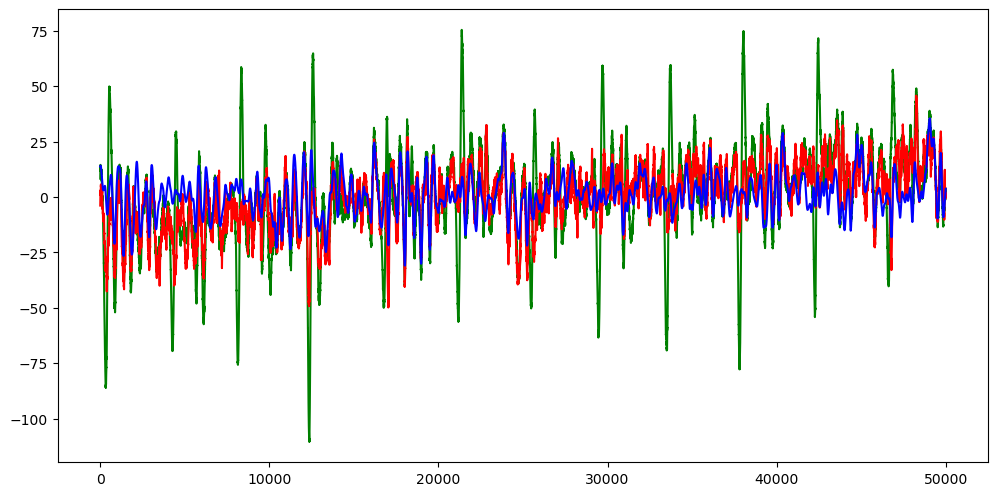

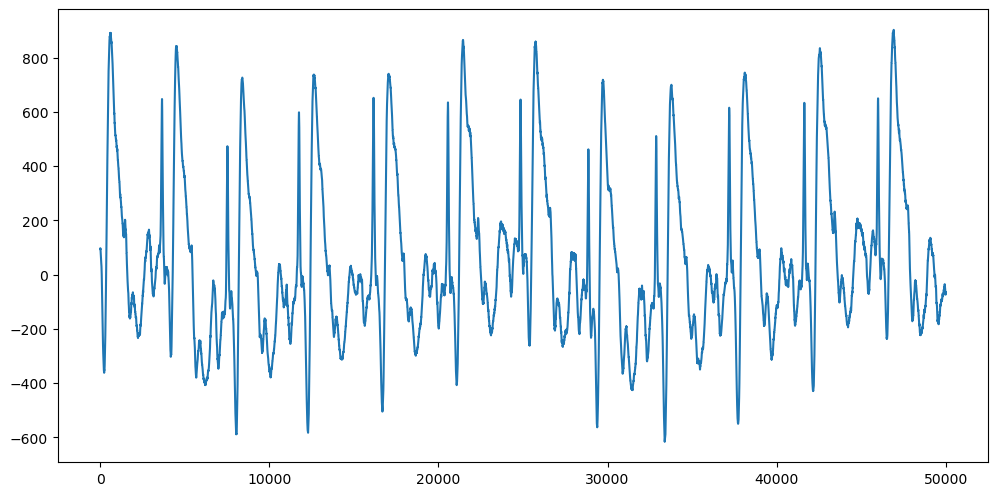

In [4]:
# Step 3: Plot EEG-BCG
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=100)

plt.plot(EEG[19, -50000:], 'g')
plt.plot(EEG_unet[19, -50000:], 'r')
plt.plot(EEG_OBS[19, -50000:], 'b')
plt.show()

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(ECG[-50000:])
plt.show()


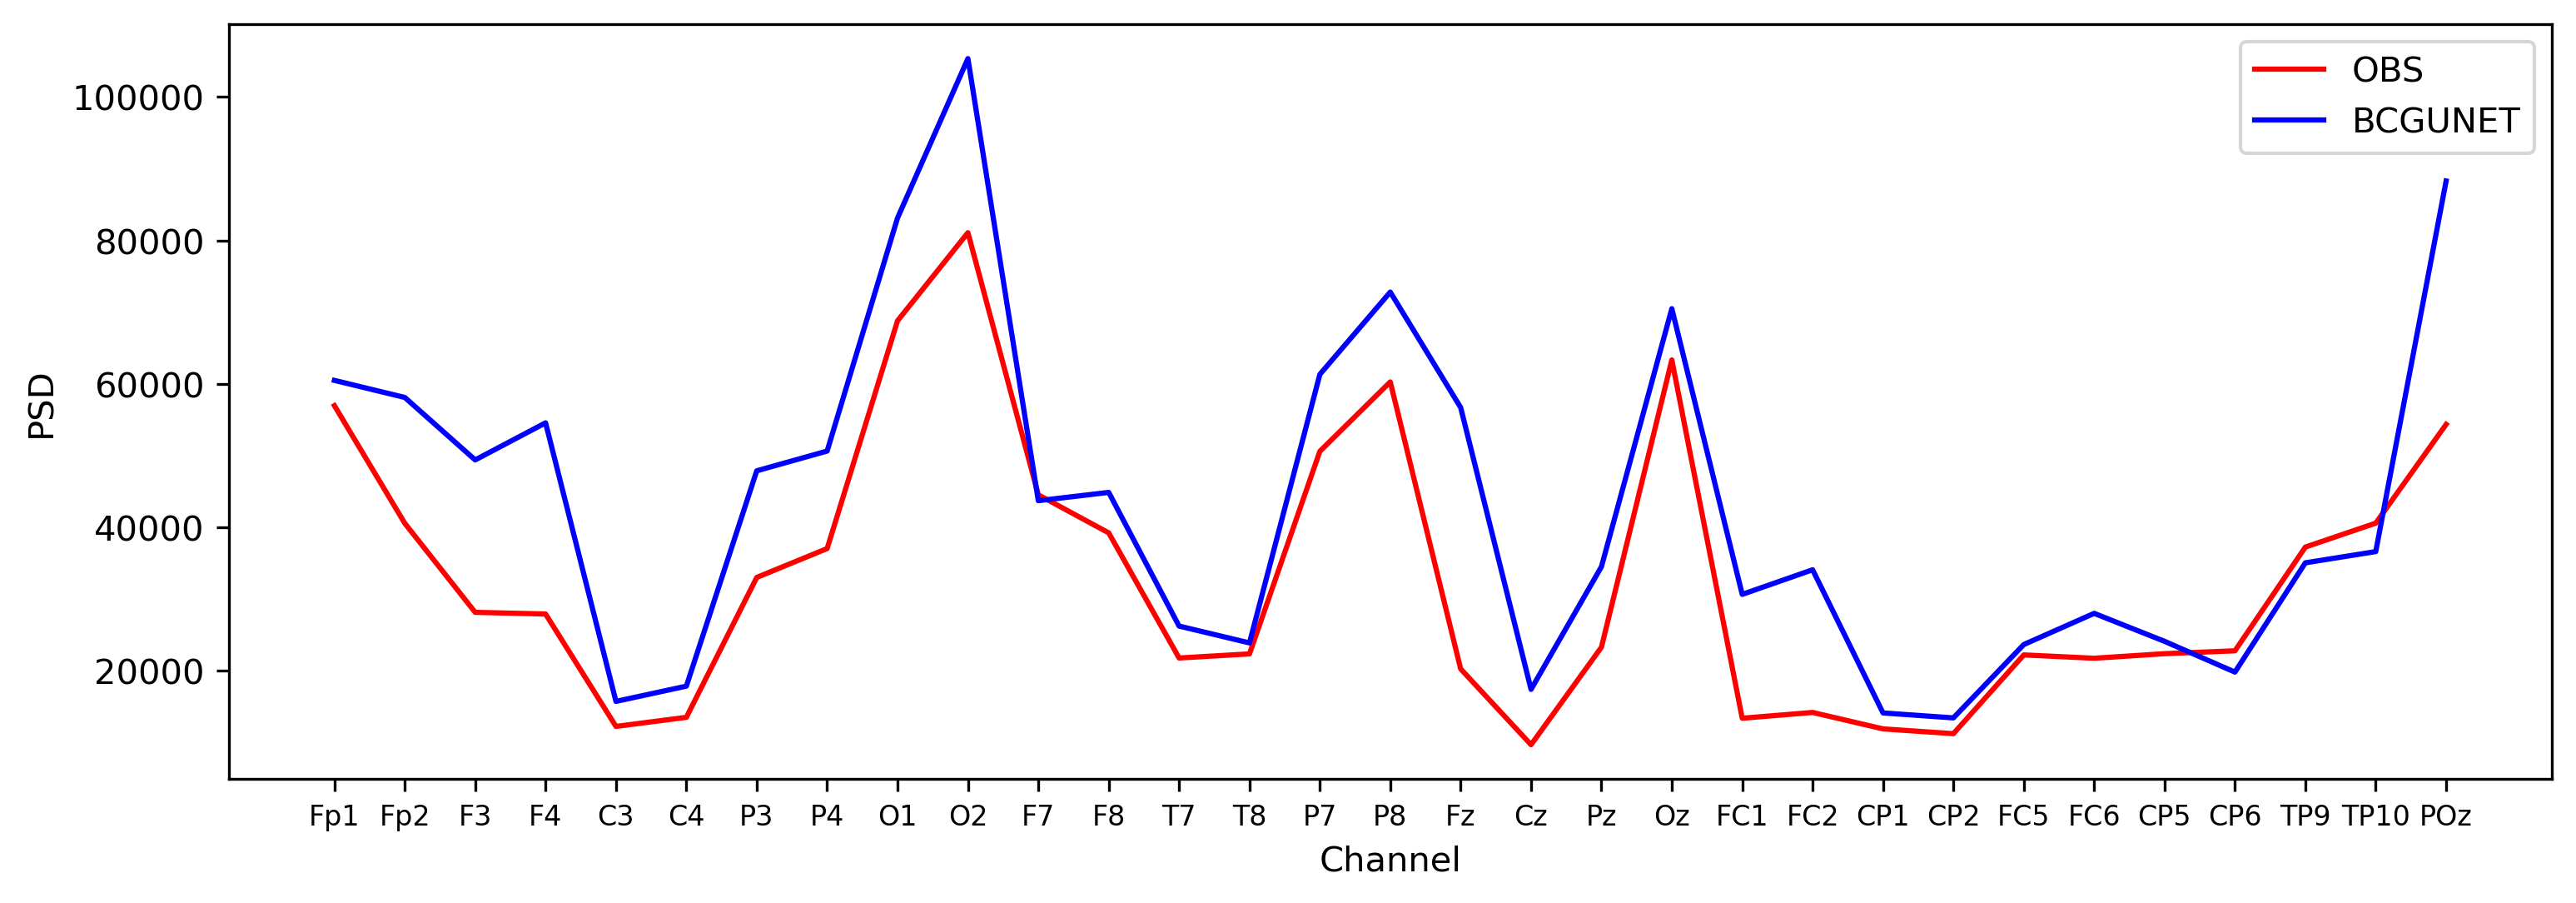

In [14]:
psd_obs = bcgunet.get_psd(EEG_OBS)
psd_unet = bcgunet.get_psd(EEG_unet)
label = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1',
         'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz',
         'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6',
         'CP5', 'CP6', 'TP9', 'TP10', 'POz']
plt.figure(figsize=(12, 4), dpi=300)
plt.plot(psd_obs, 'r', label='OBS')
plt.plot(psd_unet, 'b', label='BCGUNET')
plt.xlabel('Channel')
plt.ylabel('PSD')
plt.xticks(np.arange(31), label, fontsize=8)
plt.legend()
